In [1]:
%matplotlib inline
from matplotlib import pyplot as plt


In [3]:
# Download train.csv from https://www.kaggle.com/c/boston-housing/


In [7]:
import pandas as pd
import os
from os.path import expanduser
print(os.curdir)
SRC_PATH = expanduser("~") + '/congenial-broccoli/boston-housing/'
print(SRC_PATH)

.
/root/congenial-broccoli/boston-housing//


In [8]:
#housing_df = pd.read_csv(SRC_PATH + 'train.csv')
#housing_df.head()
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing_df = pd.read_csv(SRC_PATH + 'train.csv', header=None, delimiter=r"\s+", names=column_names)

In [9]:
from sklearn.model_selection import train_test_split

training_df, test_df = train_test_split(housing_df, test_size=0.2)
training_df.head()
training_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [10]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
training_features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'tax', 'ptratio', 'lstat']
training_features = [x.upper() for x in training_features]
print(training_features)
model = regression.fit(training_df[training_features], training_df['MEDV'])


['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']


In [11]:
test_df['predicted_medv'] = model.predict(test_df[training_features])
test_df.head()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,predicted_medv
432,6.44405,0.0,18.10,0,0.584,6.425,74.8,2.2004,24,666.0,20.2,97.95,12.03,16.1,22.747697
156,2.44668,0.0,19.58,0,0.871,5.272,94.0,1.7364,5,403.0,14.7,88.63,16.14,13.1,16.190671
146,2.15505,0.0,19.58,0,0.871,5.628,100.0,1.5166,5,403.0,14.7,169.27,16.65,15.6,17.587159
336,0.03427,0.0,5.19,0,0.515,5.869,46.3,5.2311,5,224.0,20.2,396.90,9.80,19.5,19.103634
337,0.03041,0.0,5.19,0,0.515,5.895,59.6,5.6150,5,224.0,20.2,394.81,10.56,18.5,18.304755


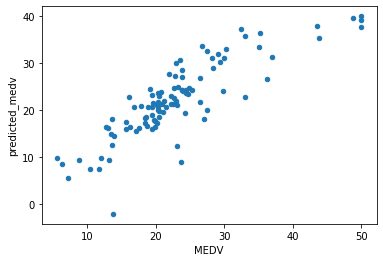

In [12]:
test_df[['MEDV', 'predicted_medv']].plot(kind='scatter', x='MEDV', y='predicted_medv')


In [13]:
model.coef_


array([-8.43308372e-02,  4.94914961e-02, -3.47075236e-02,  4.35793981e+00,
       -1.73966992e+01,  3.64283900e+00,  1.02555227e-02, -1.47650264e+00,
        9.06069904e-04, -7.66012596e-01, -6.09851664e-01])

In [14]:
model.intercept_


35.362077688849745

In [15]:
from sklearn.metrics import r2_score

r2_score(test_df['MEDV'], test_df['predicted_medv'])


0.7141430465817296